In [1]:
import math
import random
#Benötigte Pakete

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle 
import seaborn as sns
from scipy import stats
from decimal import Decimal

import matplotlib.mlab as mlab
import numpy as np
import cmath

from numpy import linalg as LA
import scipy
from scipy import spatial
import time
#import table

import os
#import h5py

from matplotlib import animation
import matplotlib
from scipy.optimize import curve_fit
from matplotlib import rc

import gc
import sys
gc.enable()
import copy

from mpl_toolkits import mplot3d

from scipy.odr import *

def poly_func_scipy(N,*a):
    return a[0]*N**(-a[1])

def poly_func(a,N):
    return a[0]*N**(-a[1])

In [2]:
import multiprocessing as mp
from init_atoms import *

### Plots for the eigenstates 

plot_one_eigenstate shows characteristics of a special eigenstate.
plot_all_eigenstates shows properties of the whole system, like Participation ratios oder level statistics.

In [3]:
def plot_two_eigenstate(p_eigenstate1, atoms_array1, p_eigenstate2,atoms_array2):
    
    # 3d and 2d scatter animation plot ------------------------------------------------------------------
    
    fig = plt.figure(figsize=(12,5))
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_trisurf(atoms_array1[:,0], atoms_array1[:,1], p_eigenstate1, cmap='jet', linewidth=0.5,
                    norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=1))
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_trisurf(atoms_array2[:,0], atoms_array2[:,1], p_eigenstate2, cmap='jet', linewidth=0.5,
                    norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=1))
    
    
    plt.show()

def plot_one_eigenstate(p_eigenstate1, atoms_array1):
    
    # 3d and 2d scatter animation plot ------------------------------------------------------------------
    
    fig = plt.figure(figsize=(5,5))
    
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_trisurf(atoms_array1[:,0], atoms_array1[:,1], p_eigenstate1, cmap='jet', linewidth=0.5,
                    norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=1))

    plt.show()

    

def plot_all_eigenstates(ipr,ratio,plot):
    
    x=np.arange(0,radius,1)   
    
    fig, axes = plt.subplots(4,2,figsize=(13,15))  # 2 rows, 2 columns
    plt.tight_layout()  
    plt.subplots_adjust(wspace=0.2)
    

   
    axes[0,0].set_title("Level Spectrum")
    bins = np.linspace(min(eigenvalues[plot]),max(eigenvalues[plot]),50)
    axes[0,0].hist(eigenvalues[plot],bins=bins)
    axes[0,0].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes[0,0].set_xlabel("energy")
    axes[0,0].set_ylabel("#")
    
    states=np.arange(0,anzahl[plot],1)
    axes[0,1].set_title("Inverse Participation Ratio - über Energie")
    axes[0,1].errorbar(eigenvalues[plot],ipr[plot], linestyle="None", marker=".") ;   
    #axes[1,0].set_yscale("log")
    axes[0,1].set_xlabel("energy")
    axes[0,1].set_ylabel("Inverse PR")
    axes[0,1].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
          
        
        
        
    states=np.arange(0,anzahl[plot],1)
    axes[1,0].set_title("Participation Ratio - über Energie")
    axes[1,0].errorbar(eigenvalues[plot],1/ipr[plot], linestyle="None", marker=".") ;   
    #axes[0,0].set_yscale("log")
    axes[1,0].set_xlabel("energy")
    axes[1,0].set_ylabel("PR")
    axes[1,0].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)   
        
        
        
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ipr[plot], statistic='mean', bins=50)
    bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ipr[plot], statistic='std', bins=50)
    

def plot_all_eigenstates(ipr,ratio,eigenvalues,plot):
    
    
    fig, axes = plt.subplots(1,figsize=(4,4))  # 2 rows, 2 columns
    plt.tight_layout()  
    plt.subplots_adjust(wspace=0.2)
    
    axes.set_title("Level Spectrum")
    bins = np.linspace(min(eigenvalues[plot]),max(eigenvalues[plot]),50)
    axes.hist(eigenvalues[plot],bins=bins)
    axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes.set_xlabel("energy")
    axes.set_ylabel("#")
    
    
    
    x=np.arange(0,radius,1)   
    
    fig, axes = plt.subplots(4,2,figsize=(13,15))  # 2 rows, 2 columns
    plt.tight_layout()  
    plt.subplots_adjust(wspace=0.2)
    
    
    states=np.arange(0,anzahl[plot],1)
    axes[0,0].set_title("Inverse Participation Ratio - über Energie")
    axes[0,0].errorbar(eigenvalues[plot],ipr[plot], linestyle="None", marker=".") ;   
    #axes[1,0].set_yscale("log")
    axes[0,0].set_xlabel("energy")
    axes[0,0].set_ylabel("Inverse PR")
    axes[0,0].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
          
        
        
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ipr[plot], statistic='mean', bins=50)
    bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ipr[plot], statistic='std', bins=50)
    
    
    axes[0,1].fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std, color="darkseagreen", alpha=0.2)
    axes[0,1].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=3,
               label='binned statistic of data')
    axes[0,1].set_title("Inverse Participation ratio - gebint")
    axes[0,1].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes[0,1].set_xlabel("energy")
    axes[0,1].set_ylabel("Inverse PR")
    
        
        
    states=np.arange(0,anzahl[plot],1)
    axes[1,0].set_title("Participation Ratio - über Energie")
    axes[1,0].errorbar(eigenvalues[plot],1/ipr[plot], linestyle="None", marker=".") ;   
    #axes[0,0].set_yscale("log")
    axes[1,0].set_xlabel("energy")
    axes[1,0].set_ylabel("PR")
    axes[1,0].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)   
        
        
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    1/ipr[plot], statistic='mean', bins=50)
    bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    1/ipr[plot], statistic='std', bins=50)
    
    
    axes[1,1].fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std, color="darkseagreen", alpha=0.2)
    axes[1,1].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=3,
               label='binned statistic of data')
    axes[1,1].set_title("Participation ratio - gebint")
    axes[1,1].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes[1,1].set_xlabel("energy")
    axes[1,1].set_ylabel("PR")
    
    

    axes[2,0].set_title("Level Spectrum")
    axes[2,0].hist(1/ipr[plot],bins=50)
    axes[2,0].set_xlabel("PR")
    axes[2,0].set_ylabel("#")
    

    axes[2,1].set_title("Level Spectrum")
    axes[2,1].hist(ipr[plot],bins=500)
    axes[2,1].ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
    axes[2,1].set_xlabel("Inverse PR")
    axes[2,1].set_ylabel("#")
    
    hist, bin_edges = np.histogram(ratio[plot], bins=500)
    axes[3,0].step(bin_edges[:-1],hist,where="post");
    axes[3,0].set_title("Häufigkeit der level spacing ratios")
    
    
    bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ratio[plot], statistic='mean', bins=50)
    bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                    ratio[plot], statistic='std', bins=50)

    
    axes[3,1].fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std, color="darkseagreen", alpha=0.2)
    axes[3,1].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=3,
               label='binned statistic of data') 
    axes[3,1].set_title("averaged level spacing ratios")
    
    fig.tight_layout()

In [4]:
def calculation(atoms):
    number_atoms=len(atoms)
    
    #Distance + Hamiltonian-------------------------------------------------------------------------------------
    distance_matrix = np.zeros((number_atoms,number_atoms),dtype=np.float16)
    distance_matrix= scipy.spatial.distance.cdist(atoms, atoms, metric='euclidean')
    
    np.fill_diagonal(distance_matrix,1)
    H=np.divide(coupling_constant,np.power(distance_matrix,3), out=distance_matrix)
    np.fill_diagonal(H,0)

#Linearisierung---------------------------------------------------------------------------------------------
    eigenvalues=np.zeros(number_atoms,dtype=np.float16)
    eigenvectors=np.zeros((number_atoms,number_atoms),dtype=np.float16)
    eigenvalues, eigenvectors = LA.eigh(H)
    
# Berechnung-----------------------------------------------------------------------------------------------
    p_eigenstates = np.square(np.absolute(eigenvectors), out=eigenvectors)  
   
    ipr_2=np.sum(p_eigenstates**2,axis=0)
    
    ratio = np.zeros([number_atoms])
    for n in range(1,number_atoms-1):
        delta_n = eigenvalues[n+1]-eigenvalues[n]
        delta_n_1 = eigenvalues[n]-eigenvalues[n-1]
   
        if np.max([delta_n,delta_n_1])==0:
            ratio[n]=0
        else:
            ratio[n] = np.min([delta_n,delta_n_1])/np.max([delta_n,delta_n_1])
        
    ratio[0]=-1
    ratio[-1]=-1
    
    return ipr_2, p_eigenstates,ratio, eigenvalues

## Calculation

In [5]:
global number_atoms
global radius

number_atoms=70
density= 0.45
r_b = 2.5
radius = (np.sqrt(number_atoms*r_b**2/density))
coupling_constant= -2.72*10**9 

global angeregt
angeregt=0                  #atom 0 is atom in the center
iteration=10
print(radius)

31.18047822311618


In [65]:
def calc(i):
    atoms_array_tmp= produce_atoms(number_atoms, radius, r_b,versuch_max=1000)                 
    ipr_2_tmp, p_eigenstates_tmp,ratio_tmp,eigenvalues_tmp = calculation(atoms_array_tmp)
    return atoms_array_tmp,ipr_2_tmp, p_eigenstates_tmp,ratio_tmp,eigenvalues_tmp

pool = mp.Pool(2)
start=time.time()
atoms_array_all,ipr_2_all,p_eigenstates_all, ratio_all,eigenvalues_all=zip(*pool.map(calc,np.arange(0,iteration,1)))
print(time.time()-start)
pool.close()

atoms_array_all=np.array(atoms_array_all)
ipr_2_all=np.array(ipr_2_all)
p_eigenstates_all= np.array(p_eigenstates_all)
ratio_all=np.array(ratio_all)
eigenvalues_all=np.array(eigenvalues_all)
pr_2_all=np.array(1/ipr_2_all)

5.45934534072876


### Lücke finden

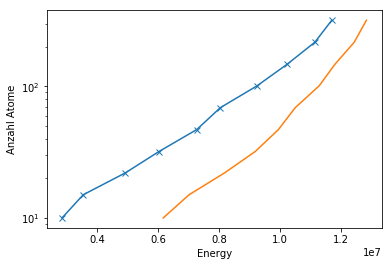

In [5]:
from scipy.signal import argrelmax,argrelmin

anzahl=[10,15,22,32,47,69,101,148,217,319]

maxima=[]
minima=[]
for k,number_atoms in enumerate(anzahl):
    data = open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Fractality/q_2/density_0.5/atoms_"+str(number_atoms)+".npy","rb")
    text=np.load(data)
    ipr=np.load(data)
    eigenvalues=np.load(data)

    hist_eigs, bin_edges_eigs= np.histogram(eigenvalues, bins=500)
    argmaxima=argrelmax(hist_eigs, order=20)
    tmp_max=bin_edges_eigs[:-1][argmaxima][-2:]
    maxima.append(tmp_max)
    
    
maxima=np.array(maxima)
minima=np.array(minima)

plt.plot(maxima[:,0],anzahl, marker="x")
plt.plot(maxima[:,1],anzahl)
plt.yscale("log")
plt.xlabel("Energy")
plt.ylabel("Anzahl Atome")
plt.show()



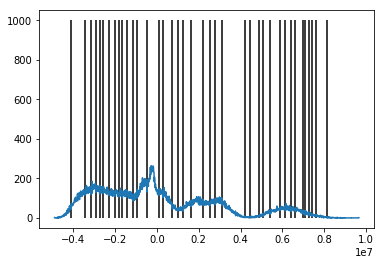

[-4090800.230463   -3441010.74706061 -3140361.88160577 -2907601.46964073
 -2733031.16066695 -2558460.85169318 -2306303.73873105 -2015353.22377476
 -1811687.86330535 -1646815.90483011 -1443150.54436071 -1152200.02940441
  -938836.31843646  -473315.49450639   108585.5354062    283155.84437998
   729279.96731297   991135.43077364  1262689.24473285  1631226.56367749
  2222825.94408862  2542871.51054055  2785330.27300413  3105375.83945606
  4210987.79628998  4453446.55875356  4870475.63019092  5083839.34115887
  5394186.55711225  5888802.43253795  6131261.19500154  6412513.35945929
  6616178.71992869  6984716.03887334  7091397.89435731  7285364.90432818
  7411443.46080924  7595712.12028156  8138819.74819998]


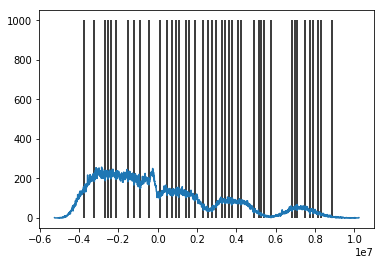

[-3731651.47165325 -3225749.14611763 -2668224.13430286 -2534005.14997708
 -2379137.09113965 -2141672.73425558 -1522200.49890584 -1212464.38123097
  -913052.80081193  -448448.62429962    98751.85025932   480759.72872499
   738873.16012072   935039.36798147  1058933.81505142  1420292.61900543
  1606134.28961035  1874572.25826191  2318527.36026256  2545667.17989079
  2752157.92500737  2979297.74463561  3278709.32505466  3423252.84663626
  3598769.97998535  3753638.03882279  4063374.15649766  4218242.2153351
  4889337.13696398  5126801.49384805  5250695.940918    5426213.07426709
  5756598.26645362  6820025.60380401  6964569.12538561  7088463.57245556
  7501445.06268872  7738909.41957279  7904102.01566605  8151890.90980595
  8275785.3568759   8853959.44320232]


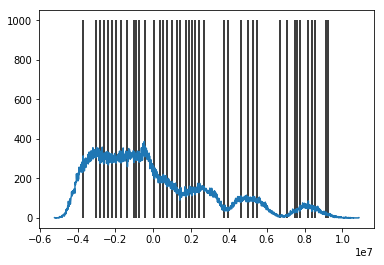

[-3735276.50148066 -3048317.82406719 -2812175.77870632 -2618968.65068378
 -2372092.87598832 -2189619.47730037 -1964211.16127408 -1706601.65724403
 -1363122.3185373  -1019642.97983057  -901571.95715013  -740566.01713135
  -440021.59576296    64463.68296255   365008.10433094   493812.85634597
   719221.17237226   976830.67640231  1234440.18043236  1406179.84978572
  1728191.72982328  1867730.21117289  2039469.88052626  2221943.27921421
  2415150.40723674  2704961.09927055  3767600.30339449  3928606.24341328
  4626298.65016132  4991245.44753722  5259588.68090186  5495730.72626273
  6697908.41173629  7095056.39711595  7481470.65316102  7621009.13451063
  7749813.88652566  8168429.33057448  8383103.91726619  8533376.12795039
  9112997.51201799  9263269.72270219]


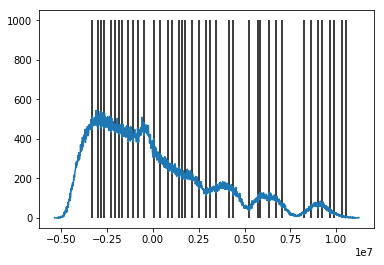

[-3313357.06361413 -2970159.5471119  -2815167.12030445 -2649103.80586789
 -2283764.51410746 -2062346.76152538 -1840929.0089433  -1674865.69450674
 -1342739.06563362 -1077037.76253513  -822407.34706573  -479209.83056351
    74334.55089169   373248.51687749   849296.68492896  1026430.88699463
  1402841.06638416  1568904.38082072  1768180.35814459  2111377.87464682
  2498858.94166546  2886340.00868409  3118828.64889528  3450955.2777684
  4137350.31077284  4369838.95098403  5266580.84894145  5720487.24173471
  5842267.00565485  6329386.06133543  6705796.24072496  7037922.86959808
  8233578.73354131  8643201.57581816  9008540.86757859  9229958.62016067
  9683865.01295393  9849928.32739049 10303834.72018375 10514181.58513673]


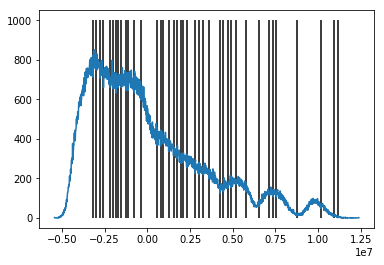

[-3189488.9498018  -3022927.86193712 -2761189.00957833 -2570833.48059013
 -2202019.64317547 -1999766.8936255  -1845103.02632258 -1714233.60014319
 -1535775.29171674 -1262139.21879619 -1119372.57205503  -762455.95520214
  -381744.89722572   546238.30659179   772285.49726529   938846.58512998
  1248174.31973581  1533707.61321813  1747857.58332986  1973904.77400336
  2104774.20018276  2307026.94973273  2782915.77220325  3020860.18343851
  3270701.81523553  3603823.9909649   4270068.34242363  4460423.87141184
  4698368.2826471   4888723.81163531  5209948.76680291  5769118.13320578
  6566231.9108439   7113504.056685    7375242.90904379  7565598.438032
  8743423.27364654 10159192.52049634 10944409.07757271 11146661.82712268]


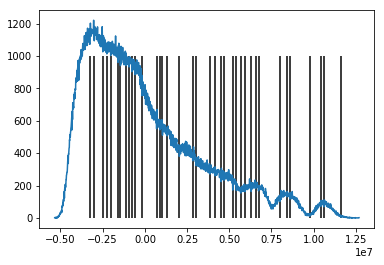

[-3262952.7486094  -2998339.84730474 -2493169.76299584 -2252612.57999161
 -2024083.25613758 -1591080.32672996 -1446746.01692742 -1121993.8198717
  -929548.07346831  -773185.90451556  -580740.15811217  -159765.08785476
   694212.91181028   886658.65821366  1043020.82716642  1331689.4467715
  2041333.13663399  2835171.84054797  3027617.58695136  3857539.86831597
  4158236.34707126  4507044.26242741  4687462.14968058  5204660.09313969
  5421161.5578435   5685774.45914816  5926331.6421524   6299195.27580896
  6563808.17711362  6732198.20521658  8007151.27513903  8404070.62709602
  8596516.37349941  9763218.71106995 10424750.9643316  10605168.85158477
 11615509.02020256]


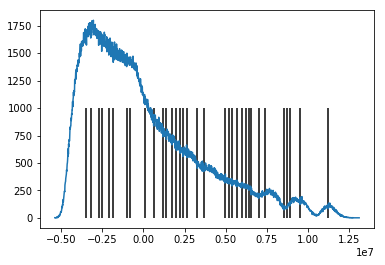

[-3461669.80142713 -3202412.90407321 -2720935.80898735 -2535752.31087741
 -2103657.48195421 -1832055.01805962 -1017247.62637587  -844409.69480659
    93853.3622838    624712.7235323   1180263.21786213  1402483.41559407
  1735813.71219197  2007416.17608655  2241981.94035915  2402474.30538777
  2649385.63620102  3279009.52977483  3661722.09253538  4945661.01276433
  5204917.91011825  5390101.4082282   5711086.13828543  5970343.03563935
  6241945.49953394  6402437.86456256  6550584.66305051  7007370.62505504
  7377737.62127493  8525875.30955658  8723404.37420719  8896242.30577647
  9513520.63280961 11241899.94850243]


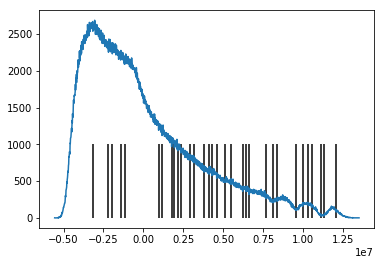

[-3165972.78864789 -2186686.02752676 -1945043.83971765 -1423605.43444536
 -1181963.24663624   954662.41399169  1170868.58203142  1768615.04661185
  1946667.18499751  2150155.34315255  2353643.50130759  2913235.93623395
  3180314.14381244  3803496.62816226  4108728.86539482  4286781.00378048
  4592013.24101304  5113451.64628533  5507709.95271073  6219918.50625337
  6423406.66440841  6614176.81267876  7682489.64299273  8114901.97907219
  8394698.19653537  9539319.08615747  9971731.42223694 10340553.70889295
 10531323.8571633  11116352.31185904 11319840.47001408 12082921.06309549]


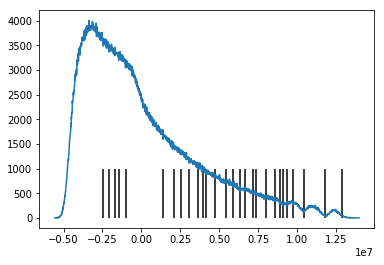

[-2440409.27810564 -2088216.00622195 -1709934.34382836 -1462094.63398428
 -1018591.99531593  1394584.12685009  2125059.06112737  2568561.69979572
  3090329.50999378  3664274.10121165  3938202.20156563  4146909.32564485
  4707809.72160776  5464373.04639495  5881787.2945534   6351378.32373165
  6664439.00985048  7147074.23428369  7355781.35836291  7981902.73060058
  8555847.32181844  8881952.20319223  9103703.52252641  9338499.03711553
  9742869.09001903 10473344.02429631 11803851.94030136 12912608.53697223]


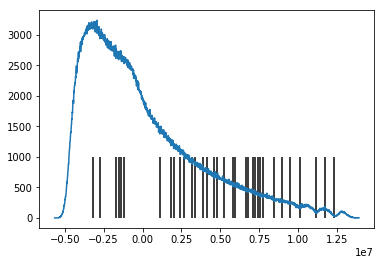

[-3191640.96427977 -2735019.43557631 -1717405.74303716 -1534757.13155578
 -1352108.52007439 -1182506.23798453  1113647.73492431  1818149.5220668
  2000798.13354818  2431327.00346859  2692253.59129914  3201060.43756871
  3344570.06087552  3892515.89531967  4114303.49497564  4623110.34124521
  4766619.96455202  5249334.15203854  5810326.31587422  5953835.93918102
  6619198.73814893  6788801.02023878  7075820.26685239  7245422.54894225
  7388932.17224905  7558534.45433891  7741183.06582029  8458731.18235431
  8980584.35801541  9450252.2161104  10115615.0150783  11172367.69579203
 11694220.87145313 12294352.0234634 ]


In [6]:
from scipy.signal import argrelmax,argrelmin

anzahl=[10,15,22,32,47,69,101,148,217,319]

maxima=[]
minima=[]
for k,number_atoms in enumerate(anzahl):
    data = open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Fractality/q_2/density_0.5/atoms_"+str(number_atoms)+".npy","rb")
    text=np.load(data)
    ipr=np.load(data)
    eigenvalues=np.load(data)

    hist_eigs, bin_edges_eigs= np.histogram(eigenvalues, bins=1500)
    argminima=argrelmin(hist_eigs, order=10)
    tmp_min=bin_edges_eigs[:-1][argminima]
    minima.append(tmp_min)
    
    plt.plot(bin_edges_eigs[:-1],hist_eigs)
    plt.vlines(tmp_min,0,1000)
    plt.show()
    print(tmp_min)
    
minima=np.array(minima) 

Text(0, 0.5, 'Anzahl Atome')

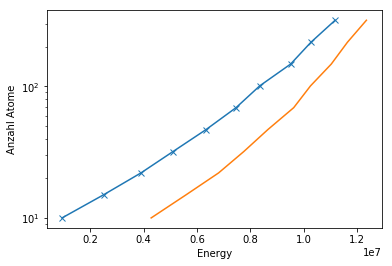

In [11]:
a=np.array([[932945.32778238,4278876.24977978],
[2494044.49361165,5591405.67036035],
[3896405.05540952, 6810612.56974944],
[5100517.53450489,7757530.56548984],
[4198685.01905305,  6340184.7201704 ,  8660142.7297142],
[5661718.74084774, 7465897.6133795 , 9630912.26041762],
[8501184.17647525, 8353019.15757469, 10260404.63300397],
[7987721.88022529,  9513883.0663881 , 11040044.2525509],
[9103703.5225264 , 10277681.09547204, 11647321.59724194],
[10011244.37994608, 11185414.02518356, 12359583.67042103]])

last1=[]
last2=[]
last3=[]
for i in range(len(anzahl)):
    if len(a[i])==2:
        last2.append(a[i][0])
        last3.append(a[i][1])
    if len(a[i])==3:
        last1.append(a[i][0])
        last2.append(a[i][1])
        last3.append(a[i][2])
    


plt.plot(last2,anzahl, marker="x")
plt.plot(last3,anzahl)
plt.yscale("log")

plt.xlabel("Energy")
plt.ylabel("Anzahl Atome")

(array([ 64, 443, 472]),)


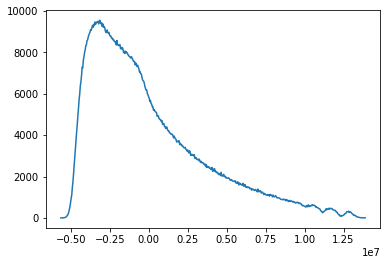

In [94]:
number_atoms=anzahl[-1]
data = open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Fractality/q_2/density_0.5/atoms_"+str(number_atoms)+".npy","rb")
text=np.load(data)
ipr=np.load(data)
eigenvalues=np.load(data)

hist_eigs, bin_edges_eigs= np.histogram(eigenvalues, bins=500)
plt.plot(bin_edges_eigs[:-1],hist_eigs)
argmaxima=argrelmax(hist_eigs, order=20)
print(argmaxima)

## PR

In [66]:
#Welche der zwei aufeinanderfolgenenden Energien hat max. Abstand der IPrs?

distance_pr=np.zeros((3))
index1=[[] for i in range(3)]
index2=[[] for i in range(3)]
z=0
for it in range(iteration):
    for k in range(number_atoms-1):
        tmp_dis=pr_2_all[it][k]-pr_2_all[it][k+1]
        if (np.max(distance_pr)<tmp_dis) and eigenvalues_all[it][k]<-0.5*10**8:
            distance_pr[z%3]=tmp_dis
            index1[z%3]=(it,k)
            index2[z%3]=(it,k+1)
            z+=1
print(distance_pr)

[13.28610544 20.06591943  0.        ]


-79781370.52700977
-79227799.17557028
[]


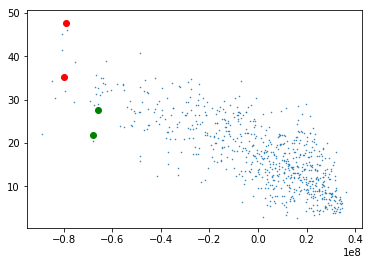

In [67]:
plt.errorbar(eigenvalues_all,pr_2_all, linestyle="none",  marker=".", markersize=1)
z= pow(number_atoms/(np.pi*radius**2), -1.0/2.0)
#plt.vlines(8*coupling_constant/z**3,0,50)
#plt.vlines(7*coupling_constant/z**3,0,50)
#plt.vlines(coupling_constant/radius,0,50)

for i in range(len(distance_pr)):
    plt.scatter(eigenvalues_all[index1[i]],pr_2_all[index1[i]], color="red",zorder=10)
    plt.scatter(eigenvalues_all[index2[i]],pr_2_all[index2[i]],zorder=1000, color="green")
    print(eigenvalues_all[index1[i]])

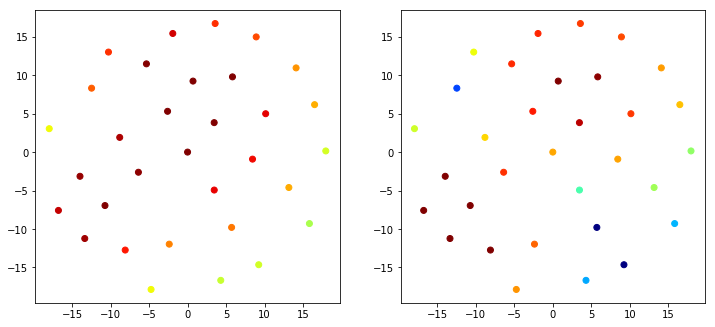

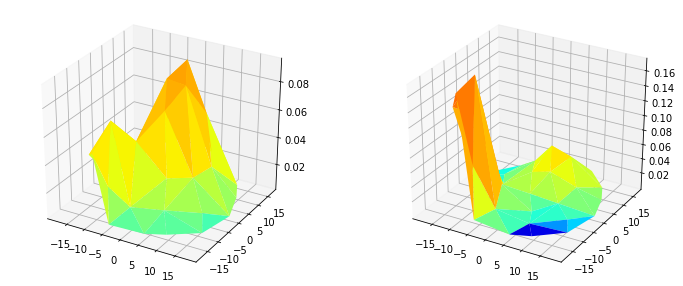

In [120]:
fig,ax = plt.subplots(1,2, figsize=(12,8))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')  

element=2


scat= ax[0].scatter(atoms_array_all[index1[element][0]][:,0], atoms_array_all[index1[element][0]][:,1], marker='o', c=p_eigenstates_all[index1[element][0]][:,index1[element][1]], cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=0.05))

scat= ax[1].scatter(atoms_array_all[index2[element][0]][:,0], atoms_array_all[index2[element][0]][:,1], marker='o', c=p_eigenstates_all[index2[element][0]][:,index2[element][1]], cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=0.05))
#vmin=1*10**-4,vmax=1*10**0

p1=p_eigenstates_all[index1[element][0]][:,index1[element][1]]
p2=p_eigenstates_all[index2[element][0]][:,index2[element][1]]
a1=atoms_array_all[index1[element][0]]
a2=atoms_array_all[index2[element][0]]
plot_two_eigenstate(p1, a1,p2,a2)


#### Allgemein

In [121]:
eig_ravel=np.ravel(eigenvalues_all)
pr_ravel=np.ravel(pr_2_all)

indices=eig_ravel<-0.8*10**8


kkk=np.argmin(np.abs(pr_ravel-np.max(pr_ravel[indices])))
index_max=kkk//number_atoms
i_max=kkk%number_atoms

kkk=np.argmin(np.abs(pr_ravel-np.min(pr_ravel[indices])))
index_min=kkk//number_atoms
i_min=kkk%number_atoms

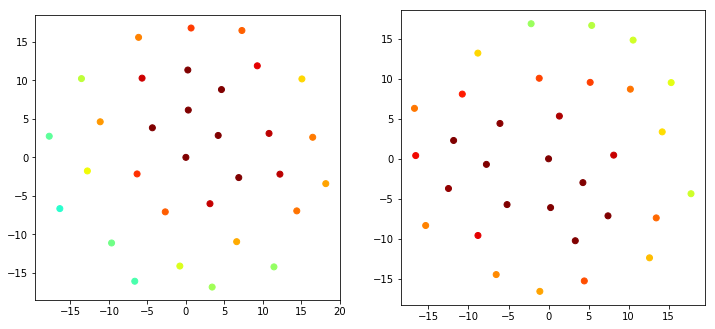

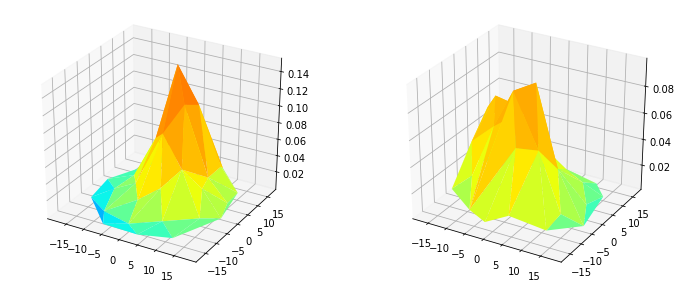

In [122]:
fig,ax = plt.subplots(1,2, figsize=(12,8))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')  

p1=p_eigenstates_all[index_min][:,i_min]
p2=p_eigenstates_all[index_max][:,i_max]
a1=atoms_array_all[index_min]
a2=atoms_array_all[index_max]


scat= ax[0].scatter(a1[:,0], a1[:,1], marker='o', c=p1, cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=0.05))

scat= ax[1].scatter(a2[:,0], a2[:,1], marker='o', c=p2, cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=0.05))
#vmin=1*10**-4,vmax=1*10**0


plot_two_eigenstate(p1, a1,p2,a2)


In [166]:
eig_ravel=np.ravel(eigenvalues_all)
pr_ravel=np.ravel(pr_2_all)

indices=(eig_ravel>-0.8*10**8) & (eig_ravel<-0.6*10**8)


kkk=np.argmin(np.abs(pr_ravel-np.max(pr_ravel[indices])))
index_max=kkk//number_atoms
i_max=kkk%number_atoms

kkk=np.argmin(np.abs(pr_ravel-np.min(pr_ravel[indices])))
index_min=kkk//number_atoms
i_min=kkk%number_atoms

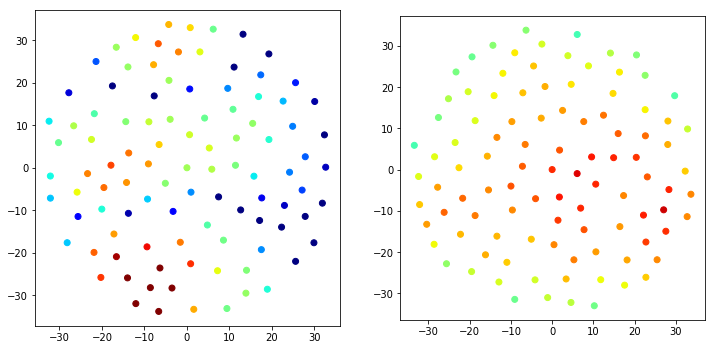

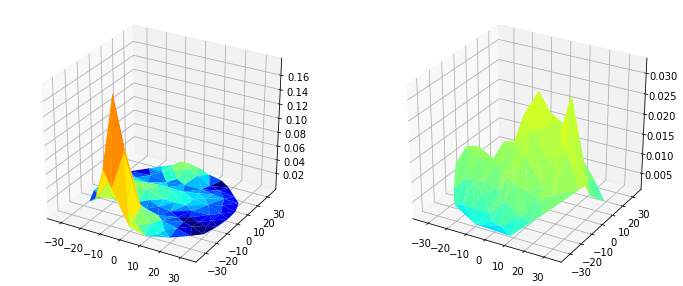

In [173]:
fig,ax = plt.subplots(1,2, figsize=(12,8))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')  

p1=p_eigenstates_all[index_min][:,i_min]
p2=p_eigenstates_all[index_max][:,i_max]
a1=atoms_array_all[index_min]
a2=atoms_array_all[index_max]


scat= ax[0].scatter(a1[:,0], a1[:,1], marker='o', c=p1, cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=0.05))

scat= ax[1].scatter(a2[:,0], a2[:,1], marker='o', c=p2, cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=0.05))
#vmin=1*10**-4,vmax=1*10**0


plot_two_eigenstate(p1, a1,p2,a2)

In [133]:
eig_ravel=np.ravel(eigenvalues_all)
pr_ravel=np.ravel(pr_2_all)

indices=(eig_ravel>-0.48*10**8) & (eig_ravel<-0.43*10**8)


ind=[]
sort=np.sort(pr_ravel[indices])
for i in range(len(sort)):
    ind.append(np.argmin(np.abs(pr_ravel-sort[i])))

ind=np.array(ind)

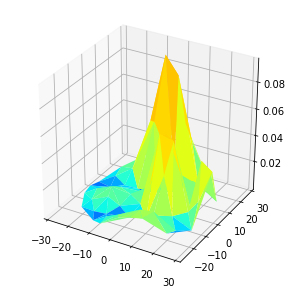

In [144]:
l=300

index=ind[l]//number_atoms
i=ind[l]%number_atoms

p1=p_eigenstates_all[index][:,i]
a1=atoms_array_all[index]

plot_one_eigenstate(p1, a1)

In [301]:
def radial_dens(p_eigenstate, atoms_array):
    schwerpunkt= np.dot(p_eigenstate,atoms_array) 
    distanz= scipy.spatial.distance.cdist([schwerpunkt],atoms_array, metric='euclidean')[0]

    density_eig_schwerpunkt=[]
    max_abstand=np.max(distanz)

    d_r=r_b
    radius_array_sp=np.arange(0,max_abstand,d_r)
    for klein in radius_array_sp:
        index = np.argwhere((klein<=distanz) & (distanz<klein+d_r))
        laenge= len(index)

        if laenge==0:
            density_eig_schwerpunkt.append(0)
        else:
            density_eig_schwerpunkt.append(np.sum(p_eigenstate[index])/len(index))


    distanz= scipy.spatial.distance.cdist([[0,0]],atoms_array, metric='euclidean')[0]
    density_eig_ursprung=[]
    max_abstand=np.max(distanz)

    d_r=r_b
    radius_array_us=np.arange(0,max_abstand,d_r)
    for klein in radius_array_us:
        index = np.argwhere((klein<=distanz) & (distanz<klein+d_r))
        laenge= len(index)

        if laenge==0:
            density_eig_ursprung.append(0)
        else:
            density_eig_ursprung.append(np.sum(p_eigenstate[index])/len(index))
            
    return radius_array_sp, radius_array_us, density_eig_schwerpunkt, density_eig_ursprung


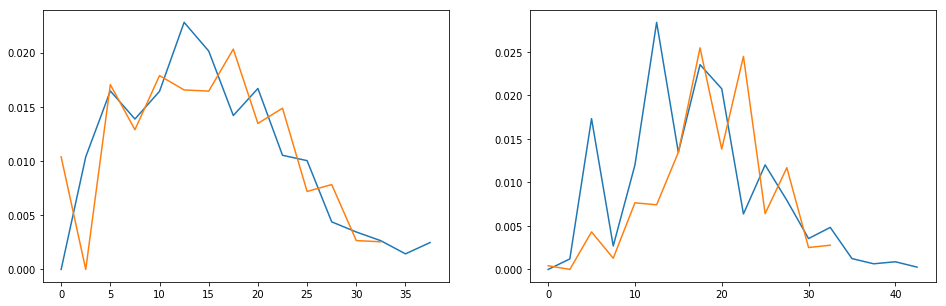

In [305]:
element=0
p_eigenstate=p_eigenstates_all[index1[element][0]][:,index1[element][1]]
atoms_array=atoms_array_all[index1[element][0]]
radius_array_sp, radius_array_us, density_eig_schwerpunkt, density_eig_ursprung =radial_dens(p_eigenstate,atoms_array)


p_eigenstate=p_eigenstates_all[index2[element][0]][:,index2[element][1]]
atoms_array=atoms_array_all[index2[element][0]]
radius_array_sp2, radius_array_us2, density_eig_schwerpunkt2, density_eig_ursprung2=radial_dens(p_eigenstate,atoms_array)

fig,ax=plt.subplots(1,2, figsize=(16,5))
ax[0].plot(radius_array_sp,density_eig_schwerpunkt)
ax[0].plot(radius_array_us,density_eig_ursprung)

ax[1].plot(radius_array_sp2,density_eig_schwerpunkt2)
ax[1].plot(radius_array_us2,density_eig_ursprung2)

## DOS Oscillation

In [54]:
data = open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Fractality/q_2/density_0.5/atoms_32.npy","rb")
text=np.load(data)
ipr=np.load(data)
eigenvalues=np.load(data)
it=len(eigenvalues)/32

Text(0.5, 1.0, '10 ATome')

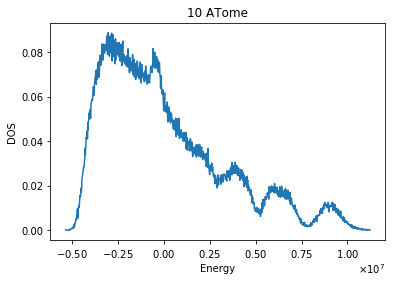

In [60]:
hist_eigs, bin_edges_eigs= np.histogram(eigenvalues, bins=1000, weights=np.ones_like(eigenvalues)/it)
plt.plot(bin_edges_eigs[:-1],hist_eigs)
plt.xlabel("Energy")
plt.ylabel("DOS")
plt.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
plt.title("10 ATome")

/home/jp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':


Text(0.5, 1.0, '69Atome - log(E^-0.153742)')

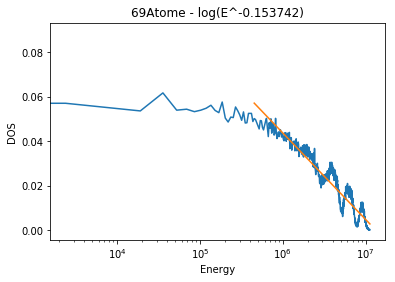

In [32]:
hist_eigs, bin_edges_eigs= np.histogram(eigenvalues, bins=1000, weights=np.ones_like(eigenvalues)/it)
plt.plot(bin_edges_eigs[:-1],hist_eigs)
plt.xscale("log")
plt.xlabel("Energy")
plt.ylabel("DOS")
plt.title("1500 Atome")

def log_func(N,a,k,c):
    return a*np.log(N**-k)+c

popt,pcov = curve_fit(log_func,bin_edges_eigs[:-1][350:],hist_eigs[350:], p0=[1,1,15])


plt.plot(bin_edges_eigs[350:],log_func(bin_edges_eigs[350:],*popt))
plt.title("69Atome - log(E^-%f)"%popt[1])

Text(0.5, 1.0, '10 Atome')

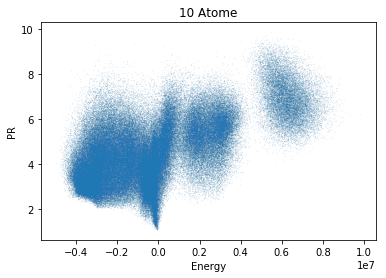

In [325]:
plt.errorbar(eigenvalues,1/ipr, linestyle="none",  marker=".", markersize=0.07)
plt.xlabel("Energy")
plt.ylabel("PR")
plt.title("10 Atome")

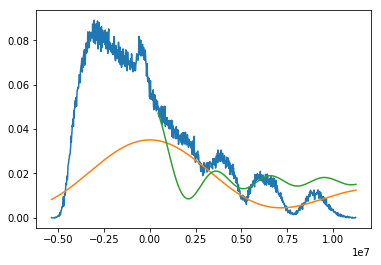

In [39]:

#plt.xscale("log")
hist_eigs, bin_edges_eigs= np.histogram(eigenvalues, bins=1000, weights=np.ones_like(eigenvalues)/it)
plt.plot(bin_edges_eigs[:-1],hist_eigs)



def func(E,a,b,k):
    return a+b*np.sin(2*np.pi*E*k)/E

popt,pcov = curve_fit(func,bin_edges_eigs[:-1][350:],hist_eigs[350:], p0=[0.5,1000000,10**-6.5])


plt.plot(bin_edges_eigs,func(bin_edges_eigs,0.01,40000,10**-7))
#plt.plot(bin_edges_eigs[:-1][300:],hist_eigs[300:])

#plt.xscale("log")

#plt.ylim(0,1)
plt.plot(bin_edges_eigs[350:],func(bin_edges_eigs[350:],*popt))

In [12]:
a=np.array([1,2,3])
b=np.array([1,2,1])
a-b

array([0, 0, 2])

In [ ]:
## spacings=np.abs(eigenvalues[1:]-eigenvalues[:-1])

hist_spacings, bin_edges_spacings= np.histogram(spacings, bins=1000)
plt.plot(bin_edges_spacings[:-1],hist_spacings)
plt.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
plt.xlim(0,0.3*10**7)
#plt.ylim(0,10000)
#plt.xscale("log")

# 2D Square

In [50]:
global number_atoms
global radius

number_atoms=30
r_b = 2.5
#a= (np.sqrt(np.pi*number_atoms*r_b**2/density))/2
density=0.45
radius = (np.sqrt(number_atoms*r_b**2/density))
a=15
b=a
coupling_constant= -2.72*10**9 

global angeregt
angeregt=0                  #atom 0 is atom in the center
iteration=100


def calc(i):
    atoms_array_tmp= produce_atoms_2d_square(number_atoms, a,b, r_b,versuch_max=1000)                 
    ipr_2_tmp, p_eigenstates_tmp,ratio_tmp,eigenvalues_tmp = calculation(atoms_array_tmp)
    return atoms_array_tmp,ipr_2_tmp, p_eigenstates_tmp,ratio_tmp,eigenvalues_tmp

pool = mp.Pool(2)
start=time.time()
atoms_array_all,ipr_2_all,p_eigenstates_all, ratio_all,eigenvalues_all=zip(*pool.map(calc,np.arange(0,iteration,1)))
print(time.time()-start)
pool.close()

atoms_array_all=np.array(atoms_array_all)
ipr_2_all=np.array(ipr_2_all)
p_eigenstates_all= np.array(p_eigenstates_all)
ratio_all=np.array(ratio_all)
eigenvalues_all=np.array(eigenvalues_all)
pr_2_all=np.array(1/ipr_2_all)

173.6698932647705


[ 4.60983042  8.99238758 10.65258026]


<ErrorbarContainer object of 3 artists>

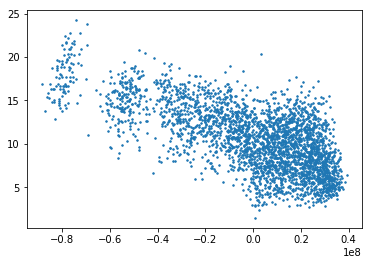

In [57]:
#Welche der zwei aufeinanderfolgenenden Energien hat max. Abstand der IPrs?

distance_pr=np.zeros((3))
index1=[[] for i in range(3)]
index2=[[] for i in range(3)]
z=0
for it in range(iteration):
    for k in range(number_atoms-1):
        tmp_dis=pr_2_all[it][k]-pr_2_all[it][k+1]
        if (np.max(distance_pr)<tmp_dis) and eigenvalues_all[it][k]<-0.5*10**8:
            distance_pr[z%3]=tmp_dis
            index1[z%3]=(it,k)
            index2[z%3]=(it,k+1)
            z+=1
print(distance_pr)

plt.errorbar(eigenvalues_all,pr_2_all, linestyle="none",  marker=".", markersize=3)




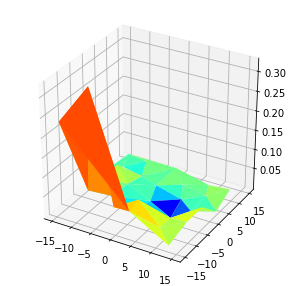

In [59]:
eig_ravel=np.ravel(eigenvalues_all)
pr_ravel=np.ravel(pr_2_all)

indices=(eig_ravel>-3*10**7) & (eig_ravel<-1*10**7)

ind=[]
sort=np.sort(pr_ravel[indices])
for i in range(len(sort)):
    ind.append(np.argmin(np.abs(pr_ravel-sort[i])))
    
ind=np.array(ind)

l=0

index=ind[l]//number_atoms
i=ind[l]%number_atoms

p1=p_eigenstates_all[index][:,i]
a1=atoms_array_all[index]

plot_one_eigenstate(p1, a1)